# Project Aim
This project aims to find the most accurate method of predicting rental bike sharing's demand using the Bike Sharing Dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

# Business case

Rental services are paid, so as a rental service company, one of your concerns is customer satisfaction. Predicting bike rental demand helps adjust supply, especially if it can be done a few days in advance. The big problem with early prediction is that it converges to the task of predicting weather, a task which is notoriously difficult. That aside, making sure customers have a bike available when they need it ensures they are satisfied with the service and will therefore avoid any bad reviews and maintain reputation.

# Tools and Technologies used

The programming language used in this project is Python . The following libraries were used for data analysis and data visualization.

Pandas : For loading the dataset and performing data wrangling

Matplotlib: For data visualization.

Seaborn: For data visualization.

NumPy: For some math operations in predictions.

Statsmodels: For statistical computations

# Attribute Information: 

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not 
- weekday : day of the week (Sun-0 to Sat-6)
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

# Importing Standard libraries

In [284]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

* pandas - used to perform data manipulation and analysis

* numpy - used to perform a wide variety of mathematical operations on arrays

* matplotlib - used for data visualization and graphical plotting

* seaborn - built on top of matplotlib with similar functionalities

* %matplotlib - to enable the inline plotting.

* warnings - to manipulate warnings details 

* filterwarnings('ignore') is to ignore the warnings thrown by the modules (gives clean results)

* max-columns is to display all the features.

# Loading the Dataset

In [285]:
df = pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# 1. Inspecting the dataframe

In [286]:
# Check the summary for the numeric columns 
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [287]:
# Check the number of rows and columns in the dataframe
df.shape

(17379, 17)

# Initial Observations from data:-
The maximum number of bikes rented was 977

On Average people are renting 189 bikes throught the duration mentioned.

There are no null values present in the dataset.

In [288]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Let us check for NULL values in the dataset.

In [289]:
# check for null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [290]:
# Converting date to Pandas datetime format
df['dteday'] = pd.to_datetime(df['dteday'])

In [291]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# 2. Data Cleaning and Analysis

In [292]:
# We will change the following Int column into a categorical column.
cols = ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']

for col in cols:
    df[col] = df[col].astype('category')
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [293]:
#The column 'instant' is very insignificant. Hence dropping that column.
df=df.drop('instant',axis=1)
df.shape

(17379, 16)

In [294]:
#dropping dteday
df=df.drop('dteday', axis=1)
df.shape

(17379, 15)

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  category
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  hum         17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  casual      17379 non-null  int64   
 13  registered  17379 non-null  int64   
 14  cnt         17379 non-null  int64   
dtypes: category(8), float64(4), int64(3)
memory usage: 1.1 MB


# Visualization

# 2.1 Univariate Analysis

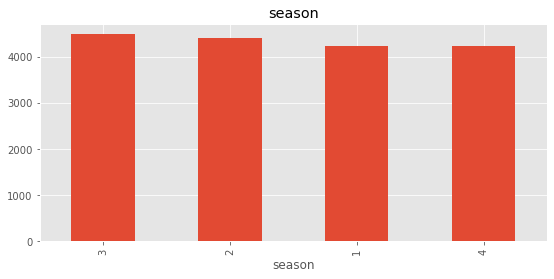

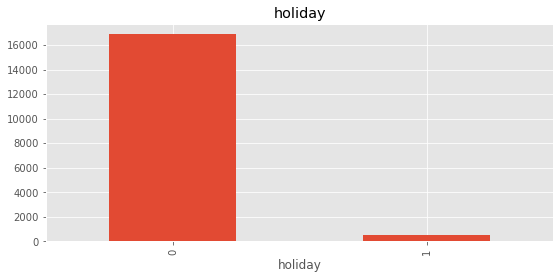

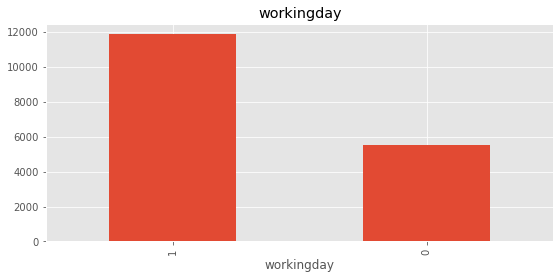

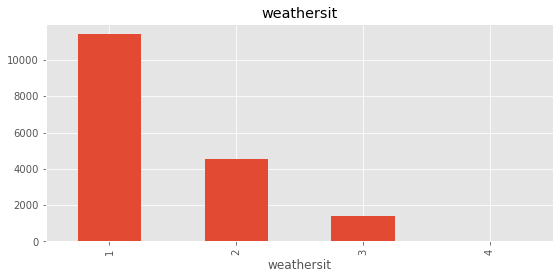

In [59]:
# Univariate analysis of few seemingly significant categorical variables:
univariate_categorical_cols=['season','holiday','workingday','weathersit']
plt.style.use('ggplot')
for column in univariate_categorical_cols:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)

In [60]:
print('Number of holidays in 2011: ',len(df[(df['holiday']==1) & (df['yr']==0)]))
print('Number of holidays in 2012: ',len(df[(df['holiday']==1) & (df['yr']==1)]))

Number of holidays in 2011:  239
Number of holidays in 2012:  261


Inferences:

1. Even though the margin is minimum, the number of days in fall is maximum and winter is minimum. Number of days as per season in decreasing order: Fall, Summer, Spring, Winter.

2. The number of public holidays is 500 in 2 years. Number of holidays in 2011 and 2012 are 239 and 261 respectively

3. The number of non-working days(Public holidays+weekends) is slightly less than half the number of working days which can be favourable for bike renting for exploring different places during non working days but can be non-favourable as well since the daily commute to office during the working days can be hampered.

4. Weather situation is mostly Clear Day case scenario and Mist+Cloudy compared to Light Snow/Rain and Heavy Snow/Rain.

In [61]:
# Univariate analysis of few seemingly significant continuous variables:
univariate_numerical_cols=df.select_dtypes(include=np.number)
univariate_numerical_cols=list(univariate_numerical_cols)
univariate_numerical_cols
univariate_continuous_var=[i for i in univariate_numerical_cols if i not in ['yr',
 'mnth',
 'day',
 'holiday',
 'weekday',
 'workingday']]
univariate_continuous_var

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

# Histogram grid analysis

Assessing how our features are distributed to get an idea of each variable's meaning in the context of bike rentals and look for possible outliers.
Here we can assess what type of distribution each feature has (uniform, normal, exponential, etc.) and what variability we are dealing with.

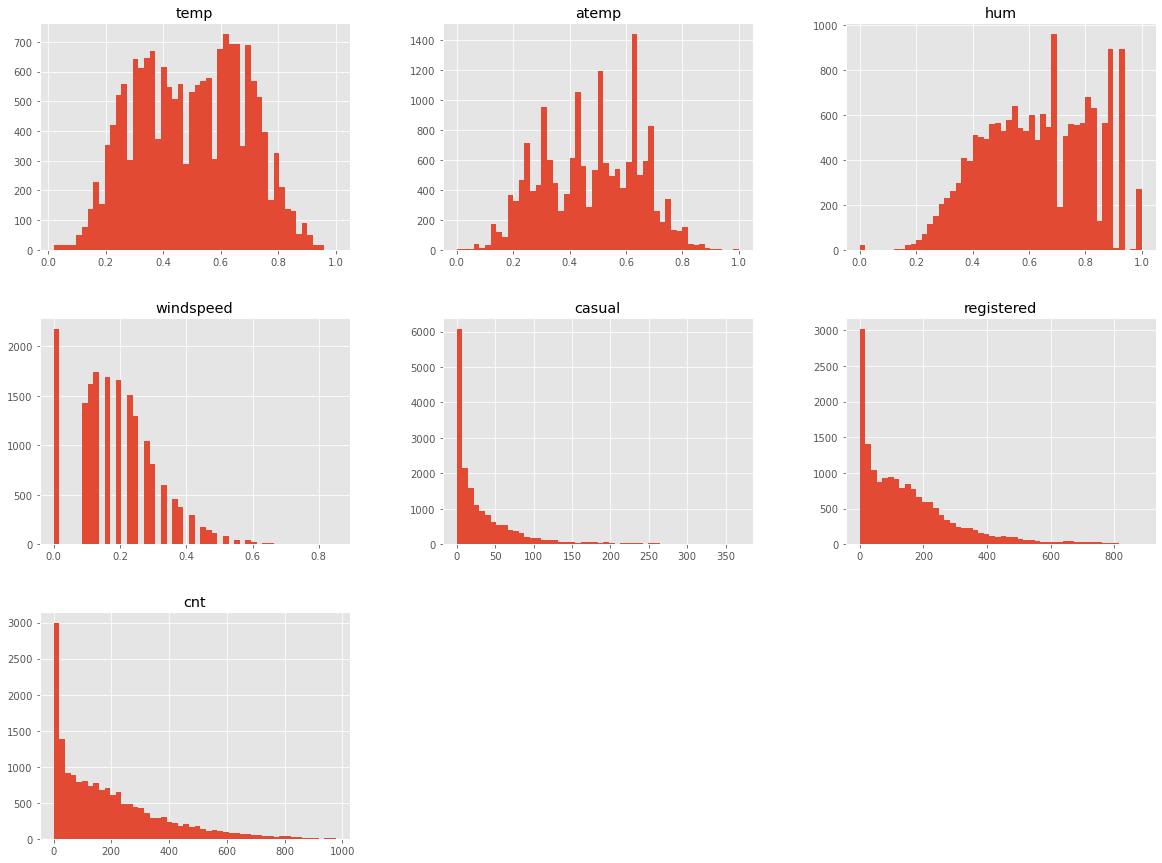

In [62]:
df.hist(bins=50,figsize=(20,15))
plt.show()

Inferences:

1. Values of temperature and feeling temperature (atemp) are differently distributed.

2. Humidity is almost randomly distributed.

3. The KDE of windspeed is not a normal distribution but has  a right skew distribution.

4. The spread of casual users is not normally distributed, instead is right skewed also, that of registered users is right skew distribution ultimately leading to cnt to be right skewed.

# 2.2 Bivariate Analysis

In [63]:
# Let us explore the graph in terms of months.

[Text(0.5, 1.0, 'Count of bikes during different months')]

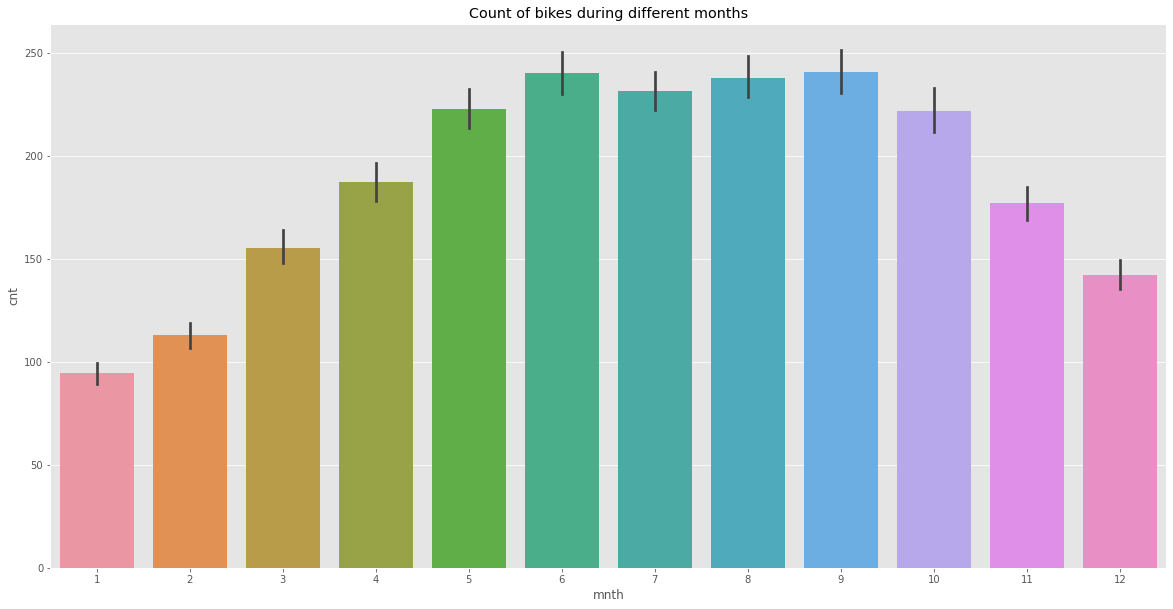

In [64]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='mnth', y='cnt', ax=ax)
ax.set(title='Count of bikes during different months')

Over a period of time, the number of users increases and gradually, the number of users decreases.

In [65]:
# Let us explore the graph in terms of weekdays.

[Text(0.5, 1.0, 'Count of bikes during different days')]

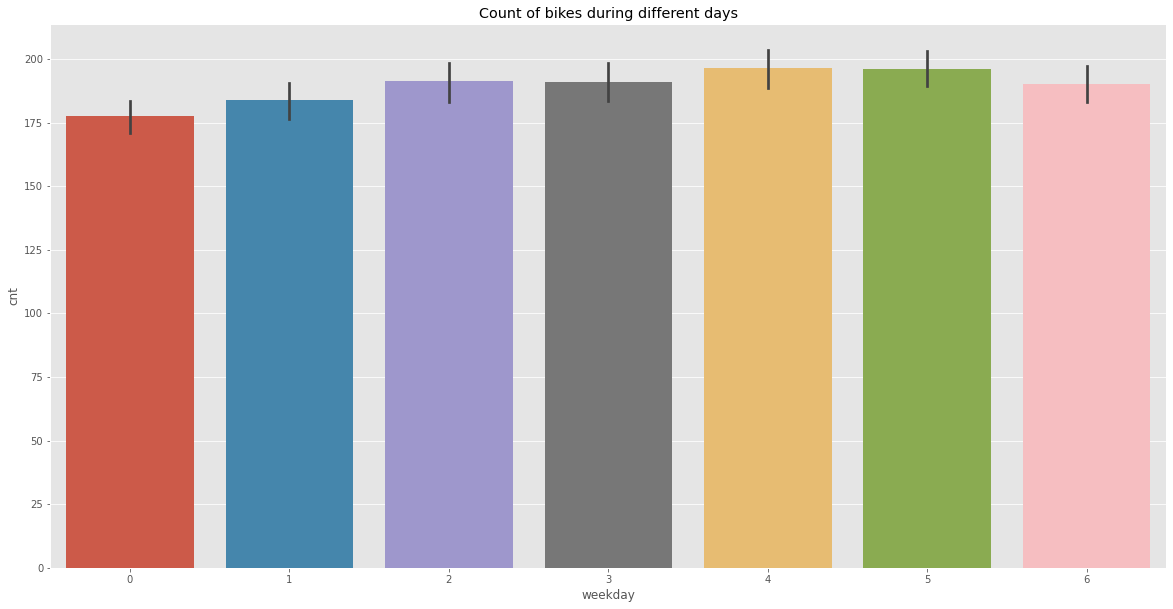

In [66]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=df, x='weekday', y='cnt', ax=ax)
ax.set(title='Count of bikes during different days')

In this graph, we observe an average number of users throughout the week.

Thus, the average distribution is impractical for predictions

In [67]:
# Regression plot of temperature and humidity with respect to count.

[Text(0.5, 1.0, 'Relation between humidity and users')]

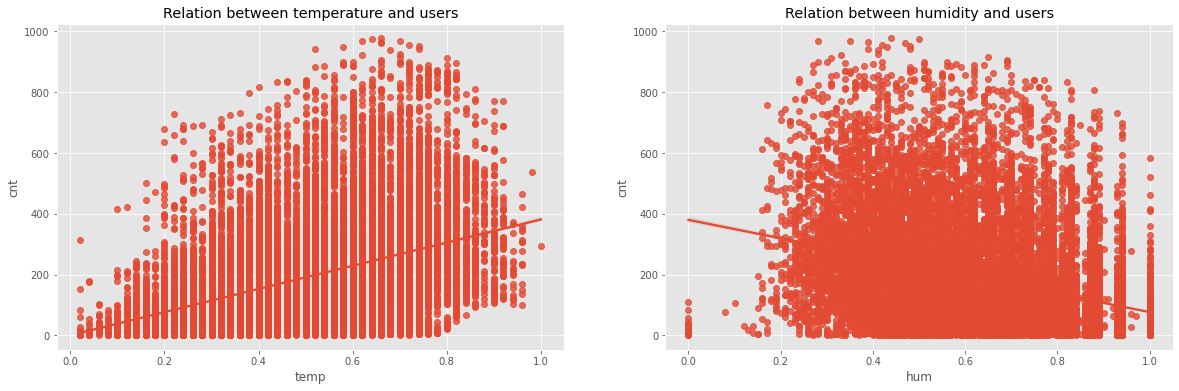

In [68]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,6))
sns.regplot(x=df['temp'], y=df['cnt'], ax=ax1)
ax1.set(title="Relation between temperature and users")
sns.regplot(x=df['hum'], y=df['cnt'], ax=ax2)
ax2.set(title="Relation between humidity and users")

With the increase in temperature, the number of user increases.

When the humidity increases the number of users decreases.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      17379 non-null  category
 1   yr          17379 non-null  category
 2   mnth        17379 non-null  category
 3   hr          17379 non-null  category
 4   holiday     17379 non-null  category
 5   weekday     17379 non-null  category
 6   workingday  17379 non-null  category
 7   weathersit  17379 non-null  category
 8   temp        17379 non-null  float64 
 9   atemp       17379 non-null  float64 
 10  hum         17379 non-null  float64 
 11  windspeed   17379 non-null  float64 
 12  casual      17379 non-null  int64   
 13  registered  17379 non-null  int64   
 14  cnt         17379 non-null  int64   
dtypes: category(8), float64(4), int64(3)
memory usage: 1.1 MB


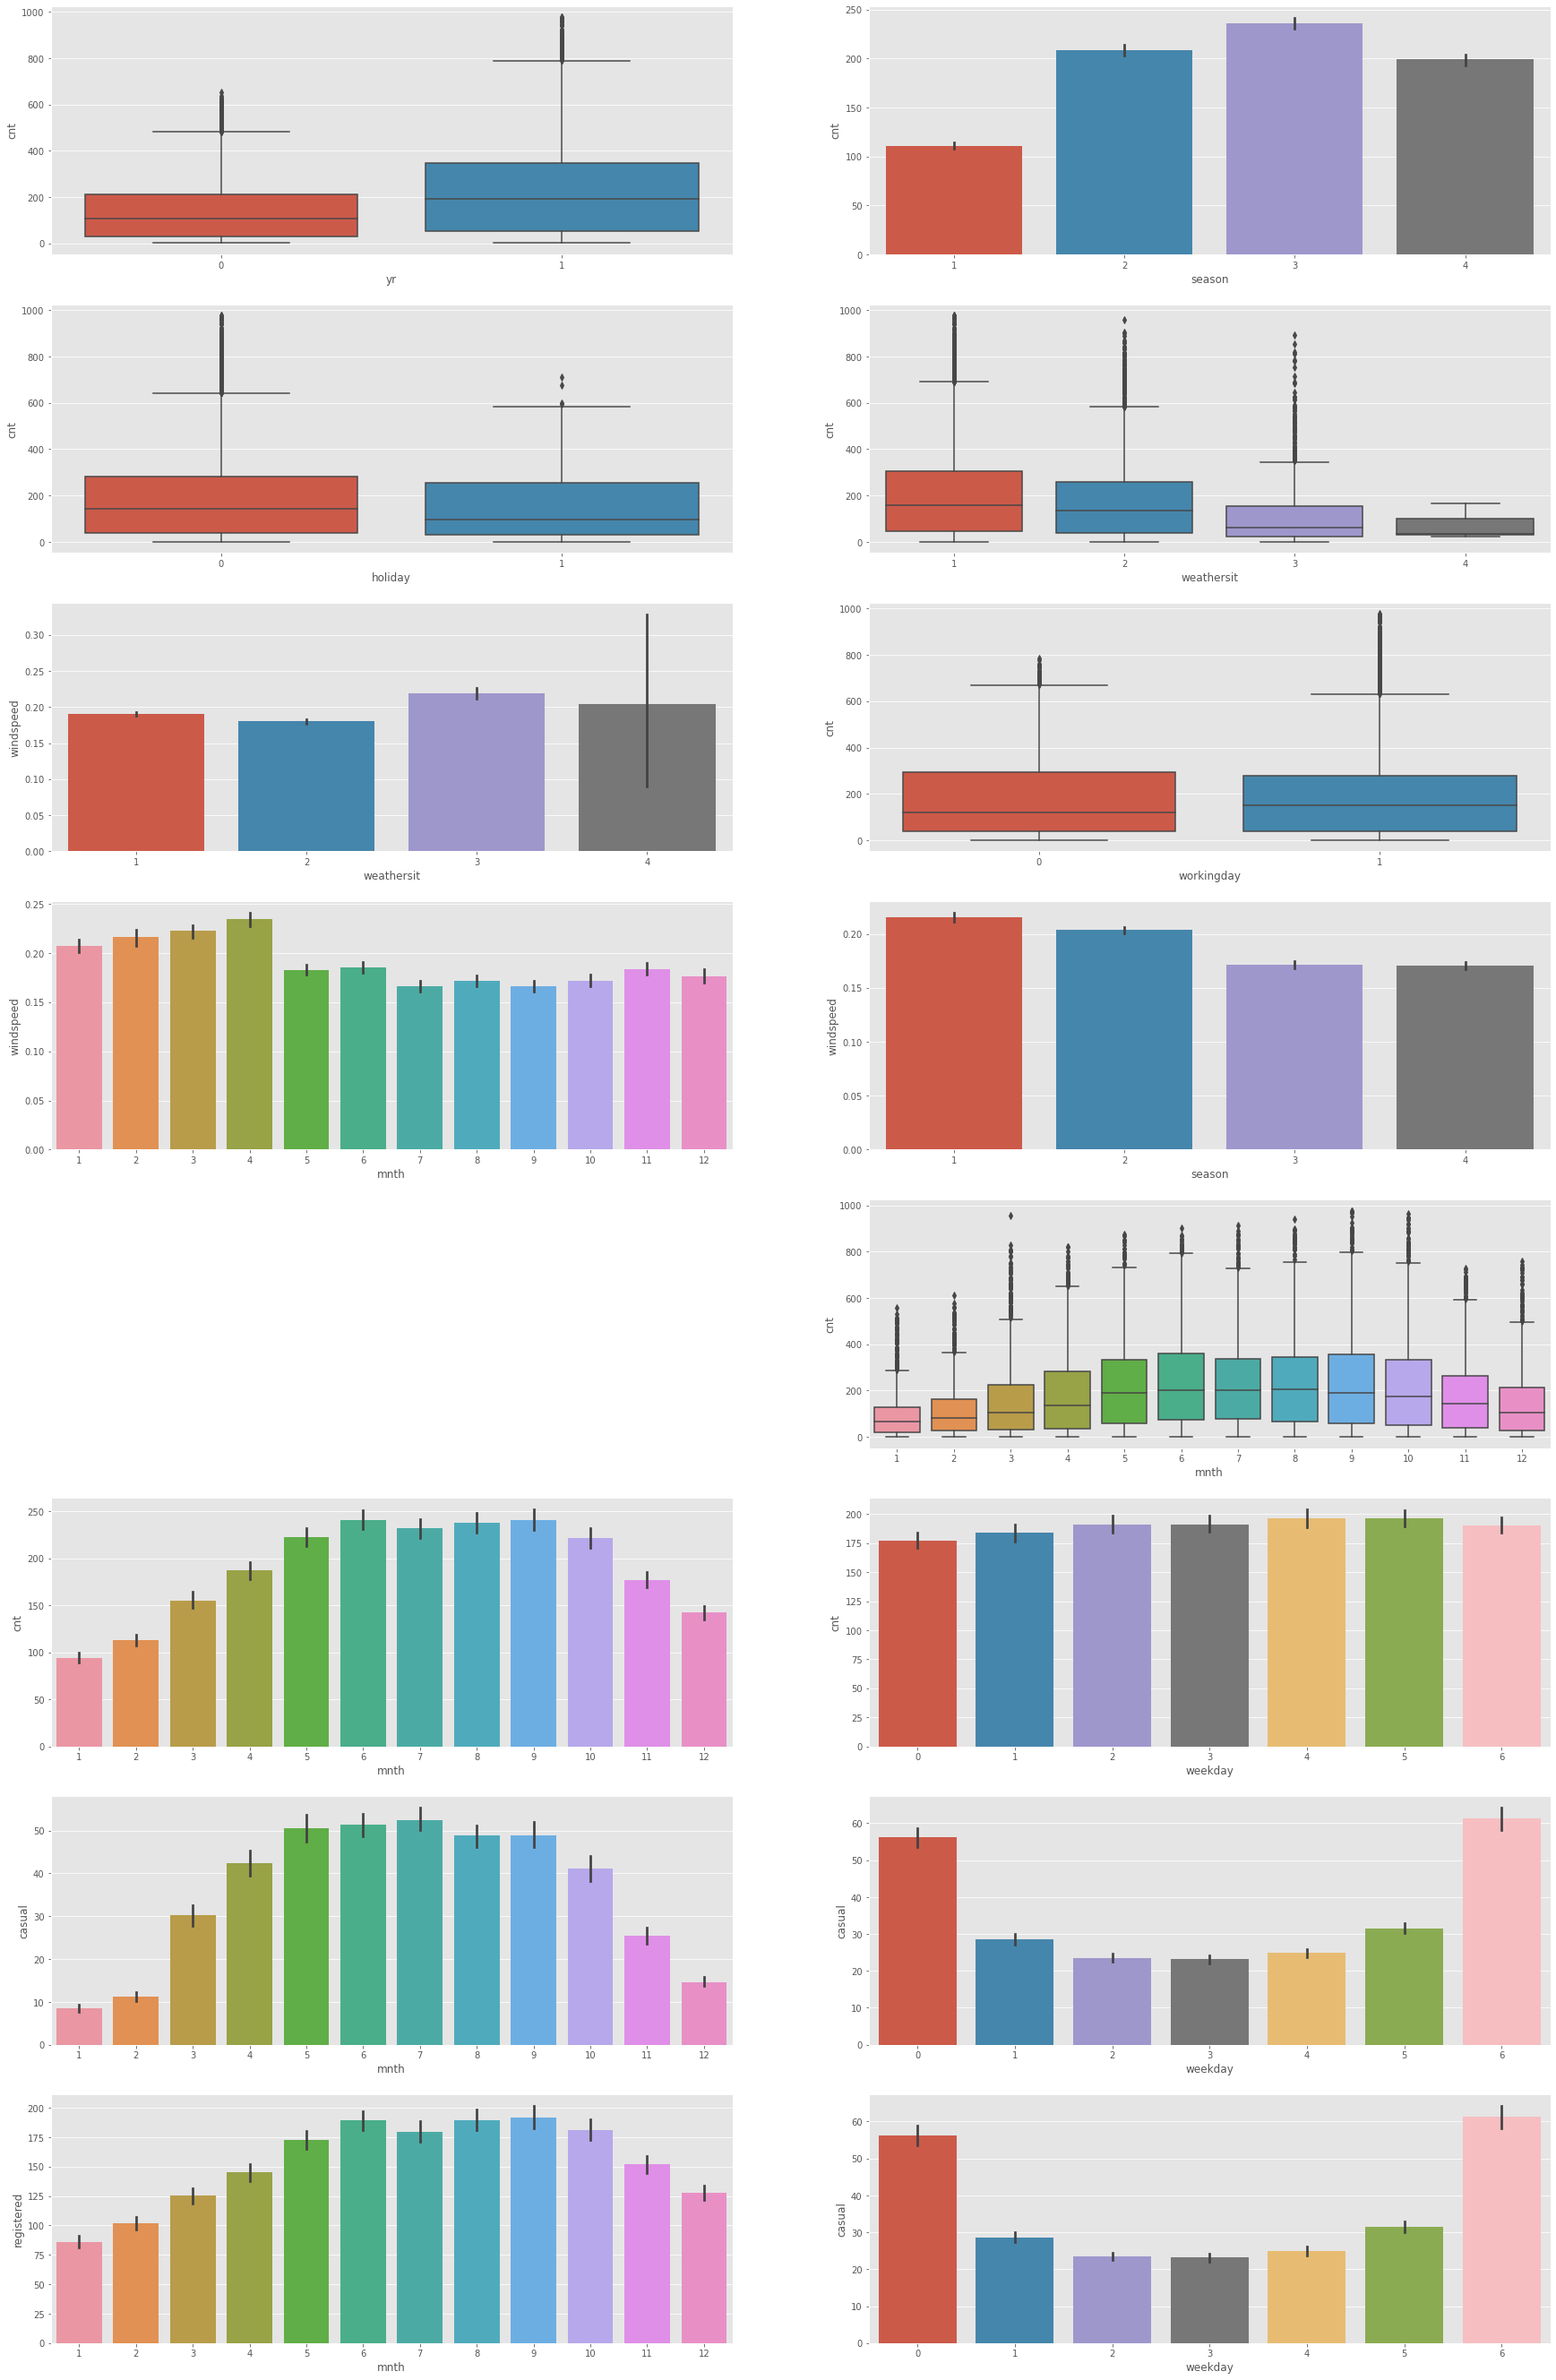

In [70]:
#Bivariate analysis of categorical variables with cnt
plt.figure(figsize=(30,48))
plt.subplot(8,2,1)
sns.boxplot(x='yr', y='cnt', data=df)

plt.subplot(8,2,2)
sns.barplot(x='season', y='cnt', data=df)

plt.subplot(8,2,3)
sns.boxplot(x='holiday', y='cnt', data=df)

plt.subplot(8,2,4)
sns.boxplot(x='weathersit', y='cnt', data=df)

plt.subplot(8,2,5)
sns.barplot(x='weathersit', y='windspeed', data=df)

plt.subplot(8,2,6)
sns.boxplot(x='workingday', y='cnt', data=df)

plt.subplot(8,2,7)
sns.barplot(x='mnth', y='windspeed', data=df)

plt.subplot(8,2,8)
sns.barplot(x='season', y='windspeed', data=df)

plt.subplot(8,2,10)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)

plt.subplot(8,2,11)
sns.barplot(x='mnth', y='cnt', data=df)

plt.subplot(8,2,12)
sns.barplot(x='weekday', y='cnt', data=df)

plt.subplot(8,2,13)
sns.barplot(x='mnth', y='casual', data=df)

plt.subplot(8,2,14)
sns.barplot(x='weekday', y='casual', data=df)

plt.subplot(8,2,15)
sns.barplot(x='mnth', y='registered', data=df)

plt.subplot(8,2,16)
sns.barplot(x='weekday', y='casual', data=df)

plt.show()

In [71]:
print('------------Winter Months-------------------------')
print('Months')
print(df[df['season']=='winter'].mnth.value_counts())
print('------------Spring Months-------------------------')
print('Months')
print(df[df['season']=='spring'].mnth.value_counts())
print('------------Summer Months-------------------------')
print('Months')
print(df[df['season']=='summer'].mnth.value_counts())
print('--------------Fall Months-------------------------')
print('Months')
print(df[df['season']=='fall'].mnth.value_counts())

------------Winter Months-------------------------
Months
mnth
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
Name: count, dtype: int64
------------Spring Months-------------------------
Months
mnth
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
Name: count, dtype: int64
------------Summer Months-------------------------
Months
mnth
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
Name: count, dtype: int64
--------------Fall Months-------------------------
Months
mnth
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
Name: count, dtype: int64


Inferences

1. The cnt in the year 2012 was way more than that in 2011. 

2. Number of bikes booked according to seasons in a decreasing order: Fall, Summer, Winter and Spring.

3. The trend of increasing use of bike starts from january(lowest) till June then stays almost the same till september and then starts dropping. There's a scope to increase the bike usage in the months from january till May and from October to december. The drop of bike usage from october till December might be explained by the winter season and less bike usage from January to April might be explained by higher windspeed.

4. Days of the week doesn't matter much. Almost similar number of bikes are rented same number of times everyday in a week.

5. The average count of bikes rented when the weather is situation is 'Clear' or 'Mist + Cloudy' is much more compared to other situations - Wind speed during the bad weather situations (light snow/rain and heavy snow/rain) is more than 'Clear' and 'Mist + Cloudy' weather situations and hence more number of bikes are rented in such situations.

6. There was a drop of bike rents by casual users in the winters and in the first 2 months of spring and less drop in the registered users. These people may be regular office going people or fitness enthusiasts.

Also, by looking at a sample of the dataset it seems like column casual + registered = count

Now we'll test wether casual + registered equals count or not.

In [72]:
test_count = df['casual'] + df['registered'] == df['cnt']
assert test_count.sum() == len(test_count)

there is no assertion error. Hence proved that casual + registered = cnt

Since we have casual+registered=cnt and inferences are built from casual and registered records, let's drop them since these columns seem irrelevant for the model. Also it is a given that increasing casual or registered users both will be profitable factor for the business.

In [120]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [121]:
df_new=df.copy()

In [122]:
df_new = df_new[['yr','season','mnth','hr','weekday','weathersit','holiday','workingday','temp','atemp','hum','windspeed','casual','registered','cnt']]
df_new.head()

,yr,season,mnth,hr,weekday,weathersit,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,1,0,6,1,0,0,0.24,0.2879,0.81,0.0,3,13,16
1,0,1,1,1,6,1,0,0,0.22,0.2727,0.80,0.0,8,32,40
2,0,1,1,2,6,1,0,0,0.22,0.2727,0.80,0.0,5,27,32
3,0,1,1,3,6,1,0,0,0.24,0.2879,0.75,0.0,3,10,13
4,0,1,1,4,6,1,0,0,0.24,0.2879,0.75,0.0,0,1,1


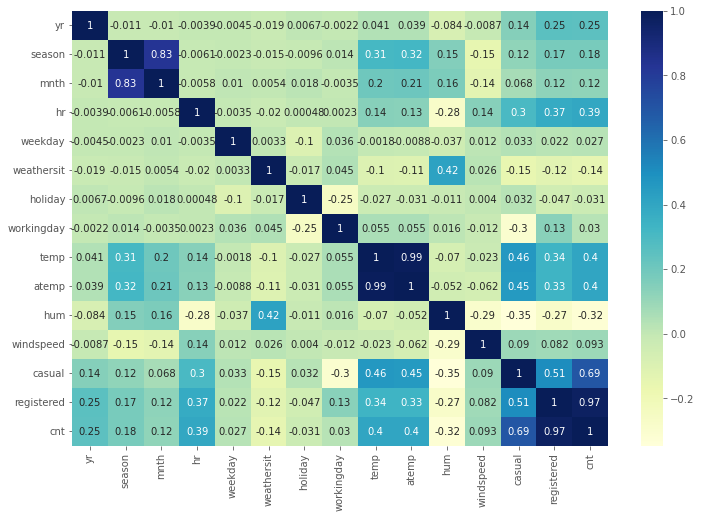

In [76]:
#Checking the colinearlity amongst the variables
plt.figure(figsize=(12,8))
sns.heatmap(df_new.corr(),annot=True,cmap="YlGnBu")
plt.show()

Since we have casual+registered=cnt and inferences are built from casual and registered records, let's drop them from original dataframe df since these columns seem irrelevant for the model. Also it is a given that increasing casual or registered users both will be profitable factor for the business.

In [296]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [297]:
df=df.drop(['casual', 'registered'],axis=1)
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


Also temp and atemp are very highly corelated and their respective colinearities with cnt are also same. Hence dropping atemp since feeling temperature can be relatively less accurate compared to temperature.

In [298]:
df=df.drop('atemp',axis=1)

In [ ]:
# Dropping holiday column as it is highly correlated to'workingday' column.

In [299]:
df=df.drop('holiday',axis=1)

In [126]:
df.head()

,season,yr,mnth,hr,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,1,0.24,0.81,0.0,16
1,1,0,1,1,6,0,1,0.22,0.80,0.0,40
2,1,0,1,2,6,0,1,0.22,0.80,0.0,32
3,1,0,1,3,6,0,1,0.24,0.75,0.0,13
4,1,0,1,4,6,0,1,0.24,0.75,0.0,1


In [127]:
# Initiating Train test split 

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)

In [130]:
# Data Transformation

In [135]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numerical_columns = ["temp", "hum","windspeed"]
categorical_columns = ["yr","mnth","hr","weekday","season","workingday","weathersit"]
num_pipeline= Pipeline(steps=[("scaler",StandardScaler())])
cat_pipeline=Pipeline(steps=[
            ("one_hot_encoder",OneHotEncoder(handle_unknown = 'error',drop='first',sparse=False)),
            ("scaler",StandardScaler(with_mean=False))
            ])


preprocessor=ColumnTransformer(
            [
            ("num_pipeline",num_pipeline,numerical_columns),
            ("cat_pipelines",cat_pipeline,categorical_columns)

            ],remainder="passthrough"
        )

In [136]:
target_column_name="cnt"

input_feature_train_df=train_set.drop(columns=[target_column_name],axis=1)
target_feature_train_df=train_set[target_column_name]  

input_feature_test_df=test_set.drop(columns=[target_column_name],axis=1)
target_feature_test_df=test_set[target_column_name]

In [137]:
# Applying preprocessing object on training dataframe and testing dataframe

In [138]:
input_feature_train_arr=preprocessor.fit_transform(input_feature_train_df)
input_feature_test_arr=preprocessor.transform(input_feature_test_df)

In [139]:
train_arr = np.c_[input_feature_train_arr, np.array(target_feature_train_df)]
test_arr = np.c_[input_feature_test_arr, np.array(target_feature_test_df)]

In [140]:
def save_object(file_path, obj):
    dir_path = os.path.dirname(file_path)

    os.makedirs(dir_path, exist_ok=True)

    with open(file_path, "wb") as file_obj:
        pickle.dump(obj, file_obj)

In [141]:
import os
import pickle
class DataTransformationConfig():
    preprocessor_obj_file_path=os.path.join('artifacts',"preprocessor.pkl")

In [142]:
save_object(

    file_path=DataTransformationConfig().preprocessor_obj_file_path,
    obj=preprocessor

)

In [143]:
trained_model_file_path=os.path.join("artifacts","model.pkl")

In [144]:
# Split training and test input data

In [145]:
X_train,y_train,X_test,y_test=(
    train_arr[:,:-1],
    train_arr[:,-1],
    test_arr[:,:-1],
    test_arr[:,-1]
)

In [146]:
# Create an Evaluate Function to give all metrics after model Training

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted) 
    return mae, rmse, r2_square


In [147]:
from catboost import CatBoostRegressor
from sklearn.ensemble import (AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor



models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "KNeighbor Regressor": KNeighborsRegressor(),
    "Support Vector Regressor":SVR(),
    "Bagging Regressor": BaggingRegressor()
}

In [148]:
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Root Mean Squared Error: 19.9026
- Mean Absolute Error: 12.4136
- R2 Score: 0.9881
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 51.8377
- Mean Absolute Error: 32.2658
- R2 Score: 0.9151


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.5989
- Mean Absolute Error: 0.0150
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 71.8891
- Mean Absolute Error: 43.3091
- R2 Score: 0.8368


Gradient Boosting
Model performance for Training set
- Root Mean Squared Error: 80.4676
- Mean Absolute Error: 58.1210
- R2 Score: 0.8050
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 79.4903
- Mean Absolute Error: 57.4594
- R2 Score: 0.8005


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 101.9672
- Mean Absolute Error: 75.5563
- R2 Score: 0.686

# Results

In [149]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
4,CatBoosting Regressor,0.932126
0,Random Forest,0.915139
8,Bagging Regressor,0.907462
1,Decision Tree,0.836792
2,Gradient Boosting,0.800454
6,KNeighbor Regressor,0.779300
3,Linear Regression,0.681019
7,Support Vector Regressor,0.439633
5,AdaBoost Regressor,0.393774


In [150]:
# So, the best performing model is CatBoostRegressor.
# Let us train it separately again from start and see its details

# CatBoostRegressor

In [151]:
catboost_model = CatBoostRegressor()
catboost_model = catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

Learning rate set to 0.062057
0:	learn: 176.7783364	total: 3.71ms	remaining: 3.71s
1:	learn: 171.8075275	total: 6.76ms	remaining: 3.37s
2:	learn: 167.2922321	total: 9.85ms	remaining: 3.27s
3:	learn: 163.0056082	total: 12.9ms	remaining: 3.22s
4:	learn: 159.1996580	total: 15.9ms	remaining: 3.17s
5:	learn: 155.8950367	total: 18.9ms	remaining: 3.14s
6:	learn: 152.7808595	total: 21.9ms	remaining: 3.11s
7:	learn: 149.4752871	total: 24.9ms	remaining: 3.08s
8:	learn: 146.8370363	total: 27.8ms	remaining: 3.07s
9:	learn: 144.3337492	total: 30.7ms	remaining: 3.04s
10:	learn: 141.5000408	total: 33.5ms	remaining: 3.01s
11:	learn: 139.1534037	total: 36.2ms	remaining: 2.98s
12:	learn: 137.0756272	total: 39ms	remaining: 2.96s
13:	learn: 135.0812394	total: 42ms	remaining: 2.96s
14:	learn: 133.4009515	total: 44.9ms	remaining: 2.94s
15:	learn: 131.2332938	total: 47.6ms	remaining: 2.93s
16:	learn: 129.2821430	total: 50.4ms	remaining: 2.91s
17:	learn: 127.4213047	total: 53ms	remaining: 2.89s
18:	learn: 125

173:	learn: 62.1949299	total: 513ms	remaining: 2.44s
174:	learn: 62.0854183	total: 516ms	remaining: 2.43s
175:	learn: 61.9512085	total: 519ms	remaining: 2.43s
176:	learn: 61.8595870	total: 522ms	remaining: 2.43s
177:	learn: 61.7619974	total: 526ms	remaining: 2.43s
178:	learn: 61.6519870	total: 529ms	remaining: 2.42s
179:	learn: 61.5550432	total: 531ms	remaining: 2.42s
180:	learn: 61.4714600	total: 535ms	remaining: 2.42s
181:	learn: 61.3868799	total: 539ms	remaining: 2.42s
182:	learn: 61.3015554	total: 543ms	remaining: 2.42s
183:	learn: 61.1821360	total: 546ms	remaining: 2.42s
184:	learn: 61.0932902	total: 549ms	remaining: 2.42s
185:	learn: 60.9861823	total: 552ms	remaining: 2.42s
186:	learn: 60.8927910	total: 555ms	remaining: 2.41s
187:	learn: 60.8051697	total: 558ms	remaining: 2.41s
188:	learn: 60.7038908	total: 561ms	remaining: 2.4s
189:	learn: 60.6275980	total: 563ms	remaining: 2.4s
190:	learn: 60.5379084	total: 566ms	remaining: 2.4s
191:	learn: 60.4281893	total: 569ms	remaining: 2.

355:	learn: 51.2208258	total: 1.04s	remaining: 1.88s
356:	learn: 51.1910738	total: 1.04s	remaining: 1.88s
357:	learn: 51.1591921	total: 1.05s	remaining: 1.88s
358:	learn: 51.1252829	total: 1.05s	remaining: 1.87s
359:	learn: 51.0920216	total: 1.05s	remaining: 1.87s
360:	learn: 51.0621099	total: 1.05s	remaining: 1.87s
361:	learn: 51.0207719	total: 1.06s	remaining: 1.86s
362:	learn: 50.9842907	total: 1.06s	remaining: 1.86s
363:	learn: 50.9470231	total: 1.06s	remaining: 1.86s
364:	learn: 50.9169150	total: 1.07s	remaining: 1.86s
365:	learn: 50.8782846	total: 1.07s	remaining: 1.86s
366:	learn: 50.8385789	total: 1.07s	remaining: 1.85s
367:	learn: 50.8033604	total: 1.08s	remaining: 1.85s
368:	learn: 50.7708797	total: 1.08s	remaining: 1.85s
369:	learn: 50.7379704	total: 1.08s	remaining: 1.84s
370:	learn: 50.7001691	total: 1.08s	remaining: 1.84s
371:	learn: 50.6668565	total: 1.09s	remaining: 1.84s
372:	learn: 50.6285187	total: 1.09s	remaining: 1.83s
373:	learn: 50.5971594	total: 1.09s	remaining:

533:	learn: 46.5612336	total: 1.56s	remaining: 1.36s
534:	learn: 46.5467210	total: 1.56s	remaining: 1.36s
535:	learn: 46.5232659	total: 1.57s	remaining: 1.36s
536:	learn: 46.5056496	total: 1.57s	remaining: 1.35s
537:	learn: 46.4779269	total: 1.57s	remaining: 1.35s
538:	learn: 46.4591548	total: 1.58s	remaining: 1.35s
539:	learn: 46.4428576	total: 1.58s	remaining: 1.35s
540:	learn: 46.4232780	total: 1.58s	remaining: 1.34s
541:	learn: 46.3950552	total: 1.59s	remaining: 1.34s
542:	learn: 46.3776488	total: 1.59s	remaining: 1.34s
543:	learn: 46.3630010	total: 1.59s	remaining: 1.34s
544:	learn: 46.3431563	total: 1.6s	remaining: 1.33s
545:	learn: 46.3223577	total: 1.6s	remaining: 1.33s
546:	learn: 46.3102806	total: 1.6s	remaining: 1.33s
547:	learn: 46.2899526	total: 1.6s	remaining: 1.32s
548:	learn: 46.2723775	total: 1.61s	remaining: 1.32s
549:	learn: 46.2557222	total: 1.61s	remaining: 1.32s
550:	learn: 46.2295732	total: 1.61s	remaining: 1.31s
551:	learn: 46.2117440	total: 1.62s	remaining: 1.3

715:	learn: 43.3849065	total: 2.09s	remaining: 828ms
716:	learn: 43.3687225	total: 2.09s	remaining: 825ms
717:	learn: 43.3514208	total: 2.09s	remaining: 822ms
718:	learn: 43.3339131	total: 2.1s	remaining: 819ms
719:	learn: 43.3179955	total: 2.1s	remaining: 817ms
720:	learn: 43.2961421	total: 2.1s	remaining: 815ms
721:	learn: 43.2794056	total: 2.11s	remaining: 812ms
722:	learn: 43.2641883	total: 2.11s	remaining: 809ms
723:	learn: 43.2468198	total: 2.12s	remaining: 807ms
724:	learn: 43.2335911	total: 2.12s	remaining: 804ms
725:	learn: 43.2179062	total: 2.12s	remaining: 801ms
726:	learn: 43.2009453	total: 2.12s	remaining: 798ms
727:	learn: 43.1834631	total: 2.13s	remaining: 795ms
728:	learn: 43.1706799	total: 2.13s	remaining: 792ms
729:	learn: 43.1575523	total: 2.13s	remaining: 789ms
730:	learn: 43.1476895	total: 2.14s	remaining: 786ms
731:	learn: 43.1347293	total: 2.14s	remaining: 783ms
732:	learn: 43.1206566	total: 2.14s	remaining: 780ms
733:	learn: 43.1091216	total: 2.15s	remaining: 77

897:	learn: 40.9674843	total: 2.61s	remaining: 297ms
898:	learn: 40.9585922	total: 2.62s	remaining: 294ms
899:	learn: 40.9433249	total: 2.62s	remaining: 291ms
900:	learn: 40.9271703	total: 2.62s	remaining: 288ms
901:	learn: 40.9172413	total: 2.62s	remaining: 285ms
902:	learn: 40.9083960	total: 2.63s	remaining: 282ms
903:	learn: 40.8997934	total: 2.63s	remaining: 279ms
904:	learn: 40.8867396	total: 2.63s	remaining: 277ms
905:	learn: 40.8763481	total: 2.64s	remaining: 274ms
906:	learn: 40.8650032	total: 2.64s	remaining: 271ms
907:	learn: 40.8477973	total: 2.64s	remaining: 268ms
908:	learn: 40.8391299	total: 2.65s	remaining: 265ms
909:	learn: 40.8292668	total: 2.65s	remaining: 262ms
910:	learn: 40.8215854	total: 2.65s	remaining: 259ms
911:	learn: 40.8152727	total: 2.65s	remaining: 256ms
912:	learn: 40.8054402	total: 2.66s	remaining: 253ms
913:	learn: 40.7959498	total: 2.66s	remaining: 250ms
914:	learn: 40.7875171	total: 2.66s	remaining: 247ms
915:	learn: 40.7759515	total: 2.67s	remaining:

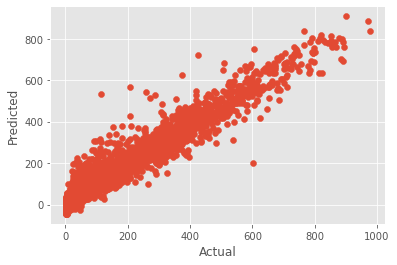

In [152]:
# Plot y_pred and y_test
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [153]:
# Difference between Actual and Predicted Values
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
0,425.0,427.279465,-2.279465
1,88.0,73.920374,14.079626
2,4.0,17.347291,-13.347291
3,526.0,515.904780,10.095220
4,13.0,40.133270,-27.133270
...,...,...,...
3471,17.0,18.078750,-1.078750
3472,85.0,40.418521,44.581479
3473,98.0,84.155197,13.844803
3474,266.0,328.198063,-62.198063


In [154]:
save_object(
    trained_model_file_path,
    catboost_model 
)

# Hyperparameter Tuning for all models

In [155]:
# Gridseach is done on the training set, during training it should not see the test set bcoz we don't want to tune our... 
# hyperparameters based on the test set

# Hyperparameter Tuning for Cat Boosting Regression model

In [156]:
CBR_parameters={
        "iterations": [1000],
        "learning_rate": [1e-3, 0.1],
        "depth": [1, 10],
        "subsample": [0.05, 1.0],
        "colsample_bylevel": [0.05, 1.0],
        "min_data_in_leaf": [1, 100]    
    
}

In [157]:
from sklearn.model_selection import GridSearchCV

cbr_tuning_model=GridSearchCV(estimator=CatBoostRegressor(),
                                   param_grid=CBR_parameters,cv=3,n_jobs=-1)

In [158]:
from datetime import datetime
cbr_tuning_model.fit(X_train,y_train)

0:	learn: 171.4607426	total: 13.2ms	remaining: 13.2s
1:	learn: 161.9172146	total: 25.3ms	remaining: 12.6s
2:	learn: 153.5296594	total: 37.1ms	remaining: 12.3s
3:	learn: 145.7077898	total: 49.2ms	remaining: 12.3s
4:	learn: 138.6796337	total: 61ms	remaining: 12.1s
5:	learn: 132.8079981	total: 72.4ms	remaining: 12s
6:	learn: 127.2522306	total: 83.7ms	remaining: 11.9s
7:	learn: 121.7237487	total: 95.1ms	remaining: 11.8s
8:	learn: 117.6682670	total: 106ms	remaining: 11.7s
9:	learn: 113.8403467	total: 118ms	remaining: 11.6s
10:	learn: 109.9445088	total: 129ms	remaining: 11.6s
11:	learn: 106.3853895	total: 140ms	remaining: 11.5s
12:	learn: 102.7033306	total: 152ms	remaining: 11.5s
13:	learn: 100.0586044	total: 163ms	remaining: 11.5s
14:	learn: 97.1064829	total: 175ms	remaining: 11.5s
15:	learn: 94.5811548	total: 186ms	remaining: 11.5s
16:	learn: 92.5296628	total: 198ms	remaining: 11.5s
17:	learn: 90.4924206	total: 212ms	remaining: 11.5s
18:	learn: 88.4529054	total: 225ms	remaining: 11.6s
19:	

168:	learn: 41.3387261	total: 2.19s	remaining: 10.8s
169:	learn: 41.2425252	total: 2.21s	remaining: 10.8s
170:	learn: 41.1662672	total: 2.22s	remaining: 10.8s
171:	learn: 41.1036753	total: 2.23s	remaining: 10.8s
172:	learn: 40.9931985	total: 2.25s	remaining: 10.7s
173:	learn: 40.9301127	total: 2.26s	remaining: 10.7s
174:	learn: 40.8670886	total: 2.27s	remaining: 10.7s
175:	learn: 40.7826115	total: 2.28s	remaining: 10.7s
176:	learn: 40.6859802	total: 2.3s	remaining: 10.7s
177:	learn: 40.6000244	total: 2.31s	remaining: 10.7s
178:	learn: 40.5490386	total: 2.32s	remaining: 10.6s
179:	learn: 40.4412696	total: 2.33s	remaining: 10.6s
180:	learn: 40.3817309	total: 2.34s	remaining: 10.6s
181:	learn: 40.3006530	total: 2.36s	remaining: 10.6s
182:	learn: 40.2397084	total: 2.37s	remaining: 10.6s
183:	learn: 40.1523506	total: 2.39s	remaining: 10.6s
184:	learn: 40.0956556	total: 2.4s	remaining: 10.6s
185:	learn: 40.0269517	total: 2.42s	remaining: 10.6s
186:	learn: 39.9211777	total: 2.43s	remaining: 1

336:	learn: 32.0072970	total: 4.33s	remaining: 8.53s
337:	learn: 31.9865429	total: 4.35s	remaining: 8.52s
338:	learn: 31.9529332	total: 4.36s	remaining: 8.5s
339:	learn: 31.9161130	total: 4.37s	remaining: 8.49s
340:	learn: 31.8983777	total: 4.39s	remaining: 8.48s
341:	learn: 31.8706404	total: 4.4s	remaining: 8.46s
342:	learn: 31.8264945	total: 4.41s	remaining: 8.45s
343:	learn: 31.7910308	total: 4.42s	remaining: 8.43s
344:	learn: 31.7681537	total: 4.43s	remaining: 8.42s
345:	learn: 31.7417128	total: 4.45s	remaining: 8.4s
346:	learn: 31.7094424	total: 4.46s	remaining: 8.39s
347:	learn: 31.6828273	total: 4.47s	remaining: 8.38s
348:	learn: 31.6601118	total: 4.48s	remaining: 8.36s
349:	learn: 31.6183024	total: 4.5s	remaining: 8.35s
350:	learn: 31.5955936	total: 4.51s	remaining: 8.34s
351:	learn: 31.5688038	total: 4.52s	remaining: 8.32s
352:	learn: 31.5366326	total: 4.54s	remaining: 8.31s
353:	learn: 31.5006605	total: 4.55s	remaining: 8.3s
354:	learn: 31.4737923	total: 4.56s	remaining: 8.29

492:	learn: 28.1542873	total: 6.31s	remaining: 6.49s
493:	learn: 28.1304984	total: 6.33s	remaining: 6.48s
494:	learn: 28.1184590	total: 6.34s	remaining: 6.47s
495:	learn: 28.1065990	total: 6.35s	remaining: 6.46s
496:	learn: 28.0849023	total: 6.37s	remaining: 6.44s
497:	learn: 28.0527324	total: 6.38s	remaining: 6.43s
498:	learn: 28.0383292	total: 6.39s	remaining: 6.42s
499:	learn: 28.0261301	total: 6.4s	remaining: 6.4s
500:	learn: 28.0141541	total: 6.42s	remaining: 6.39s
501:	learn: 28.0027886	total: 6.43s	remaining: 6.38s
502:	learn: 27.9911253	total: 6.44s	remaining: 6.36s
503:	learn: 27.9502202	total: 6.45s	remaining: 6.35s
504:	learn: 27.9387602	total: 6.46s	remaining: 6.33s
505:	learn: 27.9217342	total: 6.47s	remaining: 6.32s
506:	learn: 27.9103381	total: 6.49s	remaining: 6.31s
507:	learn: 27.8861140	total: 6.5s	remaining: 6.29s
508:	learn: 27.8746836	total: 6.51s	remaining: 6.28s
509:	learn: 27.8632993	total: 6.53s	remaining: 6.27s
510:	learn: 27.8506925	total: 6.54s	remaining: 6.

649:	learn: 25.3991338	total: 8.3s	remaining: 4.47s
650:	learn: 25.3816499	total: 8.31s	remaining: 4.46s
651:	learn: 25.3676878	total: 8.33s	remaining: 4.45s
652:	learn: 25.3568287	total: 8.34s	remaining: 4.43s
653:	learn: 25.3384863	total: 8.35s	remaining: 4.42s
654:	learn: 25.3214374	total: 8.37s	remaining: 4.41s
655:	learn: 25.2982642	total: 8.38s	remaining: 4.39s
656:	learn: 25.2774446	total: 8.39s	remaining: 4.38s
657:	learn: 25.2664900	total: 8.4s	remaining: 4.37s
658:	learn: 25.2576596	total: 8.41s	remaining: 4.35s
659:	learn: 25.2470204	total: 8.43s	remaining: 4.34s
660:	learn: 25.2352996	total: 8.44s	remaining: 4.33s
661:	learn: 25.2231456	total: 8.45s	remaining: 4.31s
662:	learn: 25.2128286	total: 8.46s	remaining: 4.3s
663:	learn: 25.2051737	total: 8.47s	remaining: 4.29s
664:	learn: 25.1883791	total: 8.49s	remaining: 4.28s
665:	learn: 25.1668782	total: 8.5s	remaining: 4.26s
666:	learn: 25.1565940	total: 8.52s	remaining: 4.25s
667:	learn: 25.1468938	total: 8.53s	remaining: 4.2

805:	learn: 23.0343654	total: 10.3s	remaining: 2.47s
806:	learn: 23.0165750	total: 10.3s	remaining: 2.46s
807:	learn: 23.0053923	total: 10.3s	remaining: 2.45s
808:	learn: 22.9916030	total: 10.3s	remaining: 2.44s
809:	learn: 22.9658844	total: 10.3s	remaining: 2.42s
810:	learn: 22.9548394	total: 10.4s	remaining: 2.41s
811:	learn: 22.9344656	total: 10.4s	remaining: 2.4s
812:	learn: 22.9225071	total: 10.4s	remaining: 2.39s
813:	learn: 22.9055892	total: 10.4s	remaining: 2.37s
814:	learn: 22.8950658	total: 10.4s	remaining: 2.36s
815:	learn: 22.8837321	total: 10.4s	remaining: 2.35s
816:	learn: 22.8677867	total: 10.4s	remaining: 2.33s
817:	learn: 22.8530634	total: 10.4s	remaining: 2.32s
818:	learn: 22.8281061	total: 10.4s	remaining: 2.31s
819:	learn: 22.8119145	total: 10.5s	remaining: 2.29s
820:	learn: 22.8025243	total: 10.5s	remaining: 2.28s
821:	learn: 22.7885825	total: 10.5s	remaining: 2.27s
822:	learn: 22.7640666	total: 10.5s	remaining: 2.26s
823:	learn: 22.7550317	total: 10.5s	remaining: 

975:	learn: 20.6168245	total: 12.5s	remaining: 307ms
976:	learn: 20.5940250	total: 12.5s	remaining: 294ms
977:	learn: 20.5821687	total: 12.5s	remaining: 281ms
978:	learn: 20.5738538	total: 12.5s	remaining: 269ms
979:	learn: 20.5582854	total: 12.5s	remaining: 256ms
980:	learn: 20.5457734	total: 12.6s	remaining: 243ms
981:	learn: 20.5324382	total: 12.6s	remaining: 230ms
982:	learn: 20.5217910	total: 12.6s	remaining: 218ms
983:	learn: 20.5093640	total: 12.6s	remaining: 205ms
984:	learn: 20.4944146	total: 12.6s	remaining: 192ms
985:	learn: 20.4764921	total: 12.6s	remaining: 179ms
986:	learn: 20.4660941	total: 12.6s	remaining: 166ms
987:	learn: 20.4542628	total: 12.6s	remaining: 153ms
988:	learn: 20.4440552	total: 12.6s	remaining: 141ms
989:	learn: 20.4310417	total: 12.7s	remaining: 128ms
990:	learn: 20.4189078	total: 12.7s	remaining: 115ms
991:	learn: 20.4023754	total: 12.7s	remaining: 102ms
992:	learn: 20.3873052	total: 12.7s	remaining: 89.5ms
993:	learn: 20.3700363	total: 12.7s	remaining

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x000001D951C85A00>,
             n_jobs=-1,
             param_grid={'colsample_bylevel': [0.05, 1.0], 'depth': [1, 10],
                         'iterations': [1000], 'learning_rate': [0.001, 0.1],
                         'min_data_in_leaf': [1, 100],
                         'subsample': [0.05, 1.0]})

In [159]:
# Check accuracy
print (f'Train Accuracy - : {cbr_tuning_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {cbr_tuning_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.988
Test Accuracy - : 0.944


In [160]:
# best hyperparameters for catboost regressor
cbr_tuning_model.best_params_

{'colsample_bylevel': 1.0,
 'depth': 10,
 'iterations': 1000,
 'learning_rate': 0.1,
 'min_data_in_leaf': 1,
 'subsample': 1.0}

In [161]:
# training catboost model with best hyperparameters
tuned_cbr_hyper_model= CatBoostRegressor(colsample_bylevel=1.0,
                                         depth=10,
                                         iterations=1000,
                                         learning_rate=0.1,
                                         min_data_in_leaf=1,
                                         subsample=1.0
                                
)

In [162]:
# fitting model
tuned_cbr_hyper_model.fit(X_train,y_train)

0:	learn: 171.4607426	total: 13ms	remaining: 13s
1:	learn: 161.9172146	total: 25.6ms	remaining: 12.8s
2:	learn: 153.5296594	total: 37.6ms	remaining: 12.5s
3:	learn: 145.7077898	total: 48.9ms	remaining: 12.2s
4:	learn: 138.6796337	total: 59.8ms	remaining: 11.9s
5:	learn: 132.8079981	total: 71ms	remaining: 11.8s
6:	learn: 127.2522306	total: 82ms	remaining: 11.6s
7:	learn: 121.7237487	total: 93.2ms	remaining: 11.6s
8:	learn: 117.6682670	total: 105ms	remaining: 11.5s
9:	learn: 113.8403467	total: 119ms	remaining: 11.8s
10:	learn: 109.9445088	total: 131ms	remaining: 11.8s
11:	learn: 106.3853895	total: 142ms	remaining: 11.7s
12:	learn: 102.7033306	total: 154ms	remaining: 11.7s
13:	learn: 100.0586044	total: 165ms	remaining: 11.6s
14:	learn: 97.1064829	total: 176ms	remaining: 11.6s
15:	learn: 94.5811548	total: 187ms	remaining: 11.5s
16:	learn: 92.5296628	total: 200ms	remaining: 11.6s
17:	learn: 90.4924206	total: 212ms	remaining: 11.6s
18:	learn: 88.4529054	total: 224ms	remaining: 11.6s
19:	lear

162:	learn: 41.8388705	total: 1.99s	remaining: 10.2s
163:	learn: 41.7344192	total: 2.01s	remaining: 10.2s
164:	learn: 41.6555168	total: 2.03s	remaining: 10.3s
165:	learn: 41.5969552	total: 2.05s	remaining: 10.3s
166:	learn: 41.5284366	total: 2.06s	remaining: 10.3s
167:	learn: 41.4337753	total: 2.08s	remaining: 10.3s
168:	learn: 41.3387261	total: 2.1s	remaining: 10.3s
169:	learn: 41.2425252	total: 2.11s	remaining: 10.3s
170:	learn: 41.1662672	total: 2.12s	remaining: 10.3s
171:	learn: 41.1036753	total: 2.14s	remaining: 10.3s
172:	learn: 40.9931985	total: 2.15s	remaining: 10.3s
173:	learn: 40.9301127	total: 2.16s	remaining: 10.3s
174:	learn: 40.8670886	total: 2.17s	remaining: 10.3s
175:	learn: 40.7826115	total: 2.19s	remaining: 10.2s
176:	learn: 40.6859802	total: 2.2s	remaining: 10.2s
177:	learn: 40.6000244	total: 2.21s	remaining: 10.2s
178:	learn: 40.5490386	total: 2.23s	remaining: 10.2s
179:	learn: 40.4412696	total: 2.24s	remaining: 10.2s
180:	learn: 40.3817309	total: 2.25s	remaining: 1

331:	learn: 32.1860255	total: 3.96s	remaining: 7.97s
332:	learn: 32.1426515	total: 3.98s	remaining: 7.96s
333:	learn: 32.1068702	total: 3.99s	remaining: 7.96s
334:	learn: 32.0699024	total: 4s	remaining: 7.94s
335:	learn: 32.0400608	total: 4.01s	remaining: 7.93s
336:	learn: 32.0072970	total: 4.02s	remaining: 7.92s
337:	learn: 31.9865429	total: 4.04s	remaining: 7.9s
338:	learn: 31.9529332	total: 4.05s	remaining: 7.89s
339:	learn: 31.9161130	total: 4.06s	remaining: 7.88s
340:	learn: 31.8983777	total: 4.07s	remaining: 7.86s
341:	learn: 31.8706404	total: 4.08s	remaining: 7.85s
342:	learn: 31.8264945	total: 4.09s	remaining: 7.84s
343:	learn: 31.7910308	total: 4.1s	remaining: 7.82s
344:	learn: 31.7681537	total: 4.11s	remaining: 7.81s
345:	learn: 31.7417128	total: 4.12s	remaining: 7.79s
346:	learn: 31.7094424	total: 4.13s	remaining: 7.78s
347:	learn: 31.6828273	total: 4.15s	remaining: 7.77s
348:	learn: 31.6601118	total: 4.16s	remaining: 7.76s
349:	learn: 31.6183024	total: 4.17s	remaining: 7.75

502:	learn: 27.9911253	total: 5.89s	remaining: 5.82s
503:	learn: 27.9502202	total: 5.91s	remaining: 5.81s
504:	learn: 27.9387602	total: 5.92s	remaining: 5.8s
505:	learn: 27.9217342	total: 5.93s	remaining: 5.79s
506:	learn: 27.9103381	total: 5.94s	remaining: 5.78s
507:	learn: 27.8861140	total: 5.95s	remaining: 5.76s
508:	learn: 27.8746836	total: 5.96s	remaining: 5.75s
509:	learn: 27.8632993	total: 5.98s	remaining: 5.74s
510:	learn: 27.8506925	total: 5.99s	remaining: 5.73s
511:	learn: 27.8130217	total: 6s	remaining: 5.72s
512:	learn: 27.7929708	total: 6.01s	remaining: 5.71s
513:	learn: 27.7809008	total: 6.02s	remaining: 5.69s
514:	learn: 27.7632957	total: 6.03s	remaining: 5.68s
515:	learn: 27.7516227	total: 6.04s	remaining: 5.67s
516:	learn: 27.7365045	total: 6.05s	remaining: 5.66s
517:	learn: 27.7078118	total: 6.07s	remaining: 5.64s
518:	learn: 27.6968229	total: 6.08s	remaining: 5.63s
519:	learn: 27.6700139	total: 6.09s	remaining: 5.62s
520:	learn: 27.6577791	total: 6.11s	remaining: 5.6

672:	learn: 25.0322197	total: 7.83s	remaining: 3.81s
673:	learn: 25.0183427	total: 7.85s	remaining: 3.79s
674:	learn: 25.0092334	total: 7.86s	remaining: 3.78s
675:	learn: 24.9974816	total: 7.87s	remaining: 3.77s
676:	learn: 24.9679437	total: 7.88s	remaining: 3.76s
677:	learn: 24.9540150	total: 7.89s	remaining: 3.75s
678:	learn: 24.9459731	total: 7.9s	remaining: 3.74s
679:	learn: 24.9277321	total: 7.91s	remaining: 3.72s
680:	learn: 24.9157686	total: 7.93s	remaining: 3.71s
681:	learn: 24.8996616	total: 7.94s	remaining: 3.7s
682:	learn: 24.8830503	total: 7.95s	remaining: 3.69s
683:	learn: 24.8666536	total: 7.96s	remaining: 3.68s
684:	learn: 24.8518155	total: 7.97s	remaining: 3.66s
685:	learn: 24.8392576	total: 7.98s	remaining: 3.65s
686:	learn: 24.8312667	total: 7.99s	remaining: 3.64s
687:	learn: 24.8018333	total: 8s	remaining: 3.63s
688:	learn: 24.7908993	total: 8.01s	remaining: 3.62s
689:	learn: 24.7809499	total: 8.03s	remaining: 3.61s
690:	learn: 24.7695322	total: 8.04s	remaining: 3.6s

841:	learn: 22.4628776	total: 9.77s	remaining: 1.83s
842:	learn: 22.4483174	total: 9.78s	remaining: 1.82s
843:	learn: 22.4240553	total: 9.79s	remaining: 1.81s
844:	learn: 22.4091351	total: 9.8s	remaining: 1.8s
845:	learn: 22.3975638	total: 9.81s	remaining: 1.79s
846:	learn: 22.3802686	total: 9.83s	remaining: 1.77s
847:	learn: 22.3689952	total: 9.84s	remaining: 1.76s
848:	learn: 22.3521222	total: 9.85s	remaining: 1.75s
849:	learn: 22.3355986	total: 9.86s	remaining: 1.74s
850:	learn: 22.3244362	total: 9.87s	remaining: 1.73s
851:	learn: 22.3050754	total: 9.88s	remaining: 1.72s
852:	learn: 22.2975684	total: 9.89s	remaining: 1.7s
853:	learn: 22.2805050	total: 9.9s	remaining: 1.69s
854:	learn: 22.2661716	total: 9.93s	remaining: 1.68s
855:	learn: 22.2515579	total: 9.95s	remaining: 1.67s
856:	learn: 22.2429057	total: 9.96s	remaining: 1.66s
857:	learn: 22.2335011	total: 9.97s	remaining: 1.65s
858:	learn: 22.2176179	total: 9.98s	remaining: 1.64s
859:	learn: 22.2002719	total: 10s	remaining: 1.63s

In [163]:
# Check accuracy
print (f'Train Accuracy - : {tuned_cbr_hyper_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {tuned_cbr_hyper_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.988
Test Accuracy - : 0.944


In [164]:
# prediction 

tuned_cbr_pred=tuned_cbr_hyper_model.predict(X_test)

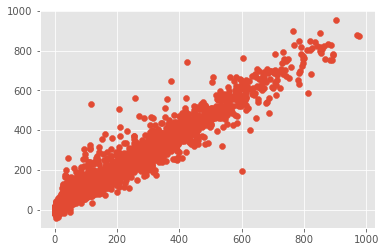

In [165]:
plt.scatter(y_test,tuned_cbr_pred)

In [166]:
# Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is 
# without the tuning of parameters.

In [167]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_cbr_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_cbr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_cbr_pred)))

MAE: 26.86409951098349
MSE: 1788.167274967652
RMSE: 42.28672693609251


In [168]:
# Catboost regressor model (before hyperparameter tuning) is at 4th position in models.values() 
list(models.values())[4]

In [169]:
# without hyperparameter tuning 
cbr_prediction=list(models.values())[4].predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,cbr_prediction))
print('MSE:', metrics.mean_squared_error(y_test, cbr_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, cbr_prediction)))

MAE: 30.29550950931159
MSE: 2149.264506521926
RMSE: 46.36016076893959


In [173]:
# Difference between Actual and Predicted Values with Hyperparameter tuning
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':tuned_cbr_pred,'Difference':y_test-tuned_cbr_pred})
pred_df

,Actual Value,Predicted Value,Difference
0,425.0,395.710051,29.289949
1,88.0,90.620582,-2.620582
2,4.0,12.302707,-8.302707
3,526.0,516.357435,9.642565
4,13.0,14.096443,-1.096443
...,...,...,...
3471,17.0,18.974234,-1.974234
3472,85.0,83.613447,1.386553
3473,98.0,74.182476,23.817524
3474,266.0,303.229539,-37.229539


In [178]:
# SO we can see hyperparameter tuning here has reduced the error rate in CatBoost model 
# and accuracy has increased from 93.36 to 94.5 percent

# Hyperparameter Tuning for Bagging Regressor model

In [179]:
BR_parameters = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [20,50,100],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

In [180]:
# Above we intialized hyperparmeters random range using Gridsearch to find the best parameters for our Bagging regressor model.

In [181]:
from sklearn.model_selection import GridSearchCV

br_tuning_model=GridSearchCV(BaggingRegressor(),
                                   param_grid=BR_parameters,cv=3,verbose=1,n_jobs=-1)

In [182]:
from datetime import datetime
br_tuning_model.fit(X_train,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=BaggingRegressor(), n_jobs=-1,
             param_grid={'base_estimator': [None, LinearRegression(),
                                            KNeighborsRegressor()],
                         'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.5, 1.0], 'max_samples': [0.5, 1.0],
                         'n_estimators': [20, 50, 100]},
             verbose=1)

In [183]:
# best hyperparameters for bagging regressor
br_tuning_model.best_params_

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 100}

In [184]:
# training bagging regressor model with best hyperparameters
tuned_br_hyper_model= BaggingRegressor(
    base_estimator= None,
    bootstrap= True,
    bootstrap_features= False,
    max_features=1.0,
    max_samples=1.0,
    n_estimators=100
)

In [185]:
# fitting model
tuned_br_hyper_model.fit(X_train,y_train)

BaggingRegressor(n_estimators=100)

In [186]:
# Check accuracy
print (f'Train Accuracy - : {tuned_br_hyper_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {tuned_br_hyper_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.988
Test Accuracy - : 0.915


In [187]:
# prediction 

tuned_br_pred=tuned_br_hyper_model.predict(X_test)

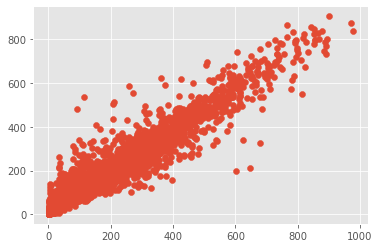

In [188]:
plt.scatter(y_test,tuned_br_pred)

In [189]:
# Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is 
# without the tuning of parameters.

In [190]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_br_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_br_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_br_pred)))

MAE: 32.29286973258809
MSE: 2687.1420429599193
RMSE: 51.83765082408653


In [191]:
# Bagging regressor (before hyperparameter tuning) is at 8th position in models.values() 
list(models.values())[8]

BaggingRegressor()

In [192]:
# without hyperparameter tuning 
br_prediction=list(models.values())[8].predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,br_prediction))
print('MSE:', metrics.mean_squared_error(y_test, br_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, br_prediction)))

MAE: 33.74286296509398
MSE: 2930.2541605732963
RMSE: 54.1318220695858


In [193]:
# SO we can see hyperparameter tuning here has reduced the error rate in Bagging Regressor Model 
# and accuracy has increased from 90.51 percent to 91.6 

# Hyperparameter Tuning for Decison Tree

In [194]:
DTR_parameters={'criterion':['squared_error', 'friedman_mse', 'absolute_error'],
                'splitter':['best','random'],
                'max_depth':[3,5,7,10,15,20,30,50],
                'min_samples_leaf':[3,5,10,15,20,23,25],
                'min_samples_split':[8,10,12,18,20],
                'max_leaf_nodes':[None,10,20,30,40,50,60]                 
               }

In [195]:
# Above we intialized hyperparmeters random range using Gridsearch to find the best parameters for our decision tree model.

In [196]:
from sklearn.model_selection import GridSearchCV

dtr_tuning_model=GridSearchCV(DecisionTreeRegressor(),
                                   param_grid=DTR_parameters,scoring='neg_mean_squared_error',cv=3,verbose=2,n_jobs=4)

In [197]:
from datetime import datetime
dtr_tuning_model.fit(X_train,y_train)

Fitting 3 folds for each of 11760 candidates, totalling 35280 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=4,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [3, 5, 7, 10, 15, 20, 30, 50],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60],
                         'min_samples_leaf': [3, 5, 10, 15, 20, 23, 25],
                         'min_samples_split': [8, 10, 12, 18, 20],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=2)

In [198]:
# best hyperparameters for decision tree regressor
dtr_tuning_model.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 50,
 'max_leaf_nodes': None,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'splitter': 'random'}

In [199]:
# training decision tree with best hyperparameters
tuned_dtr_hyper_model= DecisionTreeRegressor(
                                         max_depth=50,
                                         max_leaf_nodes=None,
                                         min_samples_leaf=5,
                                         min_samples_split=10,   
                                         splitter='random',
                                         criterion='friedman_mse')

In [200]:
# fitting model
tuned_dtr_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=50,
                      min_samples_leaf=5, min_samples_split=10,
                      splitter='random')

In [201]:
# Check accuracy
print (f'Train Accuracy - : {tuned_dtr_hyper_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {tuned_dtr_hyper_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.936
Test Accuracy - : 0.873


In [202]:
# prediction 

tuned_dtr_pred=tuned_dtr_hyper_model.predict(X_test)

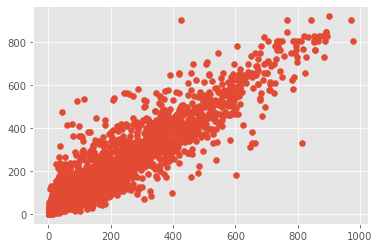

In [203]:
plt.scatter(y_test,tuned_dtr_pred)

In [204]:
# Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is 
# without the tuning of parameters.

In [205]:
# With hyperparameter tuned  

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_dtr_pred)))

MAE: 38.24465130429601
MSE: 4032.0022815369616
RMSE: 63.49804943096254


In [206]:
# Decision tree regressor (before hyperparameter tuning) is at 1st position in models.values() 
list(models.values())[1]

DecisionTreeRegressor()

In [207]:
# without hyperparameter tuning 
dtr_prediction=list(models.values())[1].predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,dtr_prediction))
print('MSE:', metrics.mean_squared_error(y_test, dtr_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_prediction)))

MAE: 43.30911967779056
MSE: 5168.03833429229
RMSE: 71.88906964408629


In [208]:
# SO we can see hyperparameter tuning here has reduced the error rate in Decision Tree model 
# and accuracy has increased from 83.59 to 87.7 percent

# Hyperparameter Tuning for Random Forest Regression Model

In [209]:
RF_parameters={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
               'max_features':['sqrt','log2',None],
               'n_estimators': [8,16,32,64,128,256]
    }

In [210]:
from sklearn.model_selection import GridSearchCV
rf_tuning_model=GridSearchCV(RandomForestRegressor(),
                                   param_grid=RF_parameters,cv=3,verbose=2,n_jobs=-1)

In [211]:
rf_tuning_model.fit(X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [8, 16, 32, 64, 128, 256]},
             verbose=2)

In [212]:
# Check Accuracy
print (f'Train Accuracy - : {rf_tuning_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_tuning_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.988
Test Accuracy - : 0.917


In [213]:
# best hyperparameters for random forest regressor
rf_tuning_model.best_params_

{'criterion': 'friedman_mse', 'max_features': None, 'n_estimators': 256}

In [214]:
# training random forest with best hyperparameters
tuned_rf_hyper_model= RandomForestRegressor(
                                         max_features=None,
                                         criterion='friedman_mse',
                                         n_estimators=256)

# fitting model
tuned_rf_hyper_model.fit(X_train,y_train)

RandomForestRegressor(criterion='friedman_mse', max_features=None,
                      n_estimators=256)

In [215]:
# Check Accuracy
print (f'Train Accuracy - : {tuned_rf_hyper_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {tuned_rf_hyper_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.988
Test Accuracy - : 0.916


In [216]:
# prediction 

tuned_rf_pred=tuned_rf_hyper_model.predict(X_test)

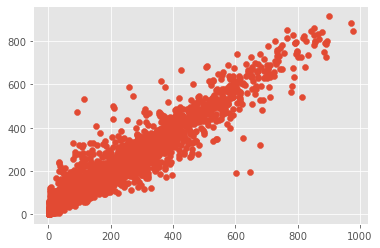

In [217]:
plt.scatter(y_test,tuned_rf_pred)

In [218]:
# Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is 
# without the tuning of parameters.

In [219]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_rf_pred)))

MAE: 32.12928610279159
MSE: 2664.538285711909
RMSE: 51.61916587578599


In [220]:
# Random forest (before hyperparameter tuning) is at 0th  position in models.values() 
list(models.values())[0]

RandomForestRegressor()

In [221]:
# without hyperparameter tuning 
rf_prediction=list(models.values())[0].predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,rf_prediction))
print('MSE:', metrics.mean_squared_error(y_test, rf_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_prediction)))

MAE: 32.265791296783384
MSE: 2687.1433793186357
RMSE: 51.837663713931356


In [222]:
# Hyperparameter Tuning to Random Forest improved its accuracy slightly from 91.56 to 91.7

# Hyperparameter Tuning for Gradient Boosting Regression Model

In [223]:
GBR_parameters = {'learning_rate': [0.2,0.02,0.02,1],
                  'max_depth'    : [2,4,6,8,10]
                 }

In [224]:
# GBR_parameters={
# #     'loss':['squared_error', 'huber', 'absolute_error', 'quantile'],
#     'learning_rate':[.1,.01,.05,.001],
#     'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
# #     'criterion':['squared_error', 'friedman_mse'],
# #     'max_features':['auto','sqrt','log2'],
#     'n_estimators': [8,16,32,64,128,256]
    
#     }

In [225]:
# GBR_parameters = {
#     'learning_rate': [0.01,0.02,0.03,0.04],
#     'subsample'    : [0.9, 0.5, 0.2, 0.1],
#     'n_estimators' : [100,500,1000, 1500],
#     'max_depth'    : [4,6,8,10]
#                  }

In [226]:
# GBR_parameters = { 'loss' : ['ls', 'lad', 'huber', 'quantile'],
#               'learning_rate' : (0.05,0.25,0.50,1),
#               'criterion' : ['friedman_mse', 'mse', 'mae'],
#               'max_features' : ['auto', 'sqrt', 'log2']
#              }

In [227]:
gbr_tuning_model=GridSearchCV(GradientBoostingRegressor(),
                             param_grid=GBR_parameters,)

In [228]:
gbr_tuning_model.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.2, 0.02, 0.02, 1],
                         'max_depth': [2, 4, 6, 8, 10]})

In [229]:
# Checking Accuracy
print(f' Train Accuracy - : {gbr_tuning_model.score(X_train,y_train):.3f}')
print(f' Test Accuracy - : {gbr_tuning_model.score(X_test,y_test):.3f}')

 Train Accuracy - : 0.981
 Test Accuracy - : 0.919


In [230]:
# best hyperparameters for Gradient Boosting model
gbr_tuning_model.best_params_

{'learning_rate': 0.2, 'max_depth': 8}

In [231]:
# training this model with best hyperparameters
tuned_gbr_hyper_model= GradientBoostingRegressor(
    learning_rate=0.2, 
    max_depth=8
)

# fitting model
tuned_gbr_hyper_model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=8)

In [232]:
# Check Accuracy
print (f'Train Accuracy - : {tuned_gbr_hyper_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {tuned_gbr_hyper_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.981
Test Accuracy - : 0.919


In [233]:
# prediction 

tuned_gbr_pred=tuned_gbr_hyper_model.predict(X_test)

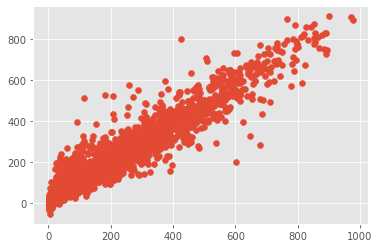

In [234]:
plt.scatter(y_test,tuned_gbr_pred)

In [235]:
# Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is 
# without the tuning of parameters.

In [236]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_gbr_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_gbr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_gbr_pred)))

MAE: 31.858045384680388
MSE: 2558.2648781491666
RMSE: 50.57929297794866


In [237]:
# Gradient Boosting Regressor (before hyperparameter tuning) is at 2nd  position in models.values() 
list(models.values())[2]

GradientBoostingRegressor()

In [238]:
# without hyperparameter tuning 
gbr_prediction=list(models.values())[2].predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,gbr_prediction))
print('MSE:', metrics.mean_squared_error(y_test, gbr_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbr_prediction)))

MAE: 57.45935389212159
MSE: 6318.704947773043
RMSE: 79.49028209644902


In [239]:
# Hyperparameter Tuning to Gradient Boosting Regressor model reduced its error rate significantly
# and improved its accuracy rate highly  from 80.05 to 92.1 percent

# Hyperparameter Tuning for KNeighbors Regressor model

In [240]:
KNR_parameters={'n_neighbors': [2,3,4,5,6], 
                'weights': ['uniform','distance']}

In [241]:
knr_tuning_model=GridSearchCV(KNeighborsRegressor(),
                             param_grid=KNR_parameters,scoring='r2',cv=3)

In [242]:
knr_tuning_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [243]:
# Checking Accuracy
print(f' Train Accuracy - : {knr_tuning_model.score(X_train,y_train):.3f}')
print(f' Test Accuracy - : {knr_tuning_model.score(X_test,y_test):.3f}')

 Train Accuracy - : 1.000
 Test Accuracy - : 0.806


In [244]:
# best hyperparameters for KNeighbors Regressor model
knr_tuning_model.best_params_

{'n_neighbors': 6, 'weights': 'distance'}

In [245]:
# training this model with best hyperparameters
tuned_knr_hyper_model= KNeighborsRegressor(
    n_neighbors=6,
    weights='distance'
)

# fitting model
tuned_knr_hyper_model.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=6, weights='distance')

In [246]:
# Check Accuracy
print (f'Train Accuracy - : {tuned_knr_hyper_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {tuned_knr_hyper_model.score(X_test,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.806


In [247]:
# prediction 

tuned_knr_pred=tuned_knr_hyper_model.predict(X_test)

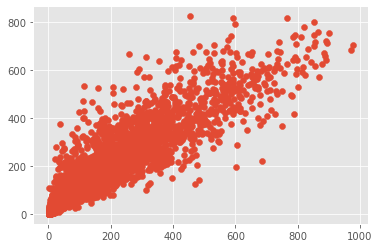

In [248]:
plt.scatter(y_test,tuned_knr_pred)

In [249]:
# Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is 
# without the tuning of parameters.

In [250]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_knr_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_knr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_knr_pred)))

MAE: 51.136170568057956
MSE: 6129.791773308663
RMSE: 78.29298674407985


In [251]:
# Kneighbors model (before hyperparameter tuning) is at 2nd  position in models.values() 
list(models.values())[6]

KNeighborsRegressor()

In [252]:
# without hyperparameter tuning 
knr_prediction=list(models.values())[6].predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,knr_prediction))
print('MSE:', metrics.mean_squared_error(y_test, knr_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knr_prediction)))

MAE: 55.75949367088607
MSE: 6988.540713463752
RMSE: 83.59749226779324


In [253]:
# Hyperparameter Tuning to K Nearest Neighbors model reduced its error rate and
# improved its accuracy slightly from 77.70 to 80.7

# Hyperparameter Tuning for Support Vector Regressor model

In [254]:
SVR_parameters={
    'C': [0.1,1,10,100],
    'gamma': [0.01,0.1,1,10],
    'kernel': ['linear']
}

In [255]:
svr_tuning_model=GridSearchCV(SVR(),
                             param_grid=SVR_parameters,cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

In [256]:
svr_tuning_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error')

In [257]:
# Checking Accuracy
print(f' Train Accuracy - : {svr_tuning_model.score(X_train,y_train):.3f}')
print(f' Test Accuracy - : {svr_tuning_model.score(X_test,y_test):.3f}')

 Train Accuracy - : -11227.528
 Test Accuracy - : -11011.133


In [258]:
# best hyperparameters for Linear Regressor model
svr_tuning_model.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'linear'}

In [259]:
# training this model with best hyperparameters
tuned_svr_hyper_model= SVR(
    C=100, 
    gamma=0.01, 
    kernel='linear'
)

# fitting model
tuned_svr_hyper_model.fit(X_train,y_train)

SVR(C=100, gamma=0.01, kernel='linear')

In [260]:
# Check Accuracy
print (f'Train Accuracy - : {tuned_svr_hyper_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {tuned_svr_hyper_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.662
Test Accuracy - : 0.652


In [261]:
# prediction 

tuned_svr_pred=tuned_svr_hyper_model.predict(X_test)

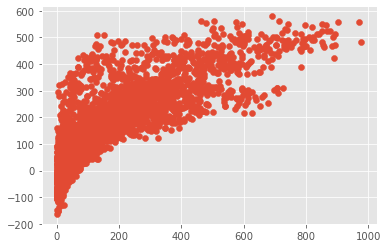

In [262]:
plt.scatter(y_test,tuned_svr_pred)

In [263]:
# Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is 
# without the tuning of parameters.

In [264]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_svr_pred)))

MAE: 70.8931222650934
MSE: 11011.133069832098
RMSE: 104.93394622252657


In [265]:
# Support Vector Regressor model (before hyperparameter tuning) is at 7th  position in models.values() 
list(models.values())[7]

SVR()

In [266]:
# without hyperparameter tuning 
svr_prediction=list(models.values())[7].predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,svr_prediction))
print('MSE:', metrics.mean_squared_error(y_test, svr_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_prediction)))

MAE: 84.27995028204026
MSE: 17744.260821483855
RMSE: 133.20758545024324


In [267]:
# Hyperparameter Tuning to Support Vector model has reduced its error slightly 
# and improved its accuracy from 43.53 percent to 65.2 percent

# Hyperparameter Tuning for Adaboost Regressor model

In [268]:
ABR_parameters={
    'learning_rate':[.1,.01,0.5,.001],
    # 'loss':['linear','square','exponential'],
    'n_estimators': [8,16,32,64,128,256]
}

In [269]:
abr_tuning_model=GridSearchCV(AdaBoostRegressor(),
                             param_grid=ABR_parameters,cv=3,n_jobs=-1)

In [270]:
abr_tuning_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.5, 0.001],
                         'n_estimators': [8, 16, 32, 64, 128, 256]})

In [271]:
# Checking Accuracy
print(f' Train Accuracy - : {abr_tuning_model.score(X_train,y_train):.3f}')
print(f' Test Accuracy - : {abr_tuning_model.score(X_test,y_test):.3f}')

 Train Accuracy - : 0.447
 Test Accuracy - : 0.430


In [272]:
# best hyperparameters for Adaboost Regressor model
abr_tuning_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 128}

In [273]:
# training this model with best hyperparameters
tuned_abr_hyper_model= AdaBoostRegressor(learning_rate=0.1,n_estimators=128)

# fitting model
tuned_abr_hyper_model.fit(X_train,y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=128)

In [274]:
# Check Accuracy
print (f'Train Accuracy - : {tuned_abr_hyper_model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {tuned_abr_hyper_model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.448
Test Accuracy - : 0.430


In [275]:
# prediction 

tuned_abr_pred=tuned_abr_hyper_model.predict(X_test)

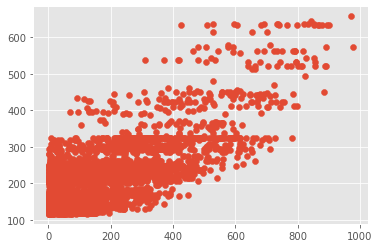

In [276]:
plt.scatter(y_test,tuned_abr_pred)

In [277]:
# Let us compare now Error rate of our model with hyper tuning of paramerters to our original model which is 
# without the tuning of parameters.

In [278]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_abr_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_abr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_abr_pred)))

MAE: 111.6125292563968
MSE: 18035.838399188182
RMSE: 134.29757406293004


In [279]:
# Adaboost Regressor model (before hyperparameter tuning) is at 5th  position in models.values() 
list(models.values())[5]

AdaBoostRegressor()

In [280]:
# without hyperparameter tuning 
abr_prediction=list(models.values())[5].predict(X_test)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,abr_prediction))
print('MSE:', metrics.mean_squared_error(y_test, abr_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, abr_prediction)))

MAE: 117.66796243136673
MSE: 19196.380421512113
RMSE: 138.5510029610472


In [281]:
# Hyperparameter Tuning to Adaboost Regressor model slightly reduced its error 
# and improved its accuracy slightly from 36.29 percent to 42.6 percent

# SO overall the best performing model that we got even after Hyperparameter tuning is CatBoost Regressor model with accuracy rate of 94.5 %